In [1]:
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [9]:
df_pair = pd.read_csv("pair6_04122023.csv", index_col=0)

In [10]:
df_pair.head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente,IT_armedforcessize,IT_cpi,IT_cpichange,IT_gasolineprice,IT_grosstertiaryeducationenrollment,IT_maternalmortalityratio,IT_minimumwage,IT_populationlaborforceparticipation,IT_taxrevenue,IT_totaltaxrate,IT_unemploymentrate,KN_armedforcessize,KN_cpi,KN_cpichange,KN_gasolineprice,KN_grosstertiaryeducationenrollment,KN_maternalmortalityratio,KN_minimumwage,KN_populationlaborforceparticipation,KN_taxrevenue,KN_totaltaxrate,KN_unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia,323000.0,149.9,2.3,0.7,9.7,638.0,0.43,48.9,9.3,71.4,11.12,323000.0,149.9,2.3,0.7,9.7,638.0,0.43,48.9,9.3,71.4,11.12


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [11]:
df_pair.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'lattitude', 'longitude',
       'continente', 'IT_armedforcessize', 'IT_cpi', 'IT_cpichange',
       'IT_gasolineprice', 'IT_grosstertiaryeducationenrollment',
       'IT_maternalmortalityratio', 'IT_minimumwage',
       'IT_populationlaborforceparticipation', 'IT_taxrevenue',
       'IT_totaltaxrate', 'IT_unemployme

In [12]:
df_pair["birthrate"].dtypes

dtype('float64')

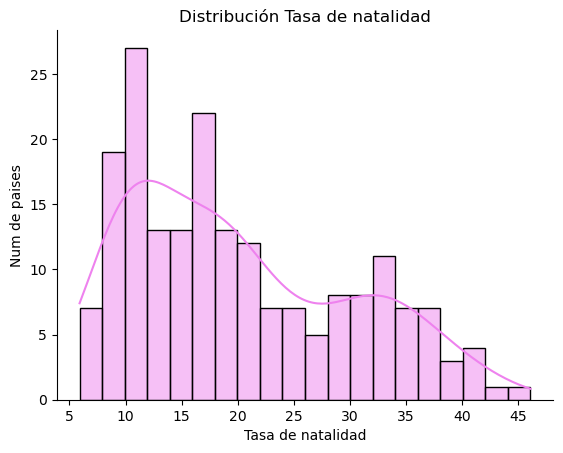

In [19]:
sns.histplot(x = "birthrate", 
             data = df_pair, 
             color = "violet", 
             kde = True, 
             bins = 20 );

plt.xlabel("Tasa de natalidad")
plt.ylabel("Num de paises")
plt.title("Distribución Tasa de natalidad");
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)


2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

In [20]:
df_pair["infantmortality"].dtypes

dtype('float64')

In [21]:
df_pair["lifeexpectancy"].dtypes

dtype('float64')

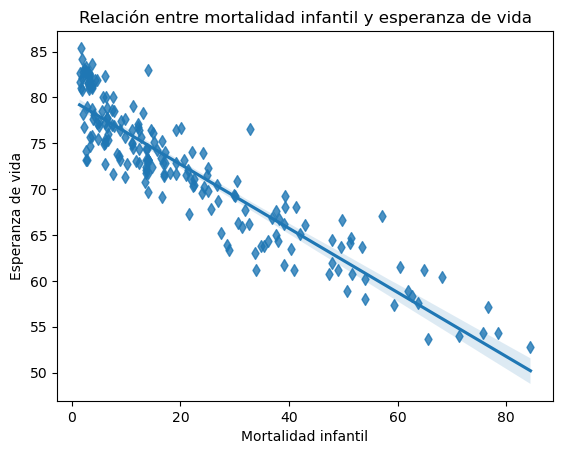

In [25]:
sns.regplot(x = "infantmortality", 
            y = "lifeexpectancy", 
            data = df_pair, 
            marker = "d")

# cambiamos los nombres de los ejes
plt.xlabel("Mortalidad infantil")
plt.ylabel("Esperanza de vida")
plt.title("Relación entre mortalidad infantil y esperanza de vida");

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [26]:
df_continentes = df_pair.groupby("continente")["country"].count().reset_index()
df_continentes

,continente,country
0,América del Norte,21
1,América del Sur,12
2,Asia,43
3,Desconocido,15
4,Europa,42
5,Oceanía,13
6,África,49


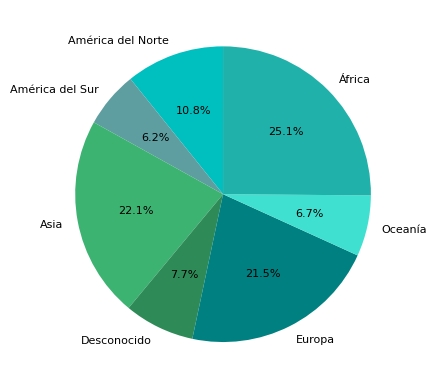

In [27]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("country", labels= "continente",
        data = df_continentes, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

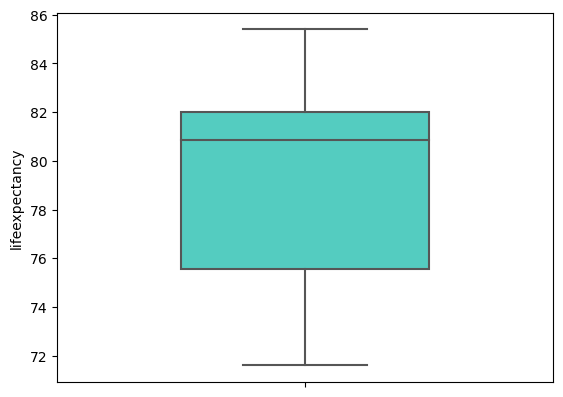

In [44]:

sns.boxplot(y = "lifeexpectancy", 
            data = df_europa, 
            width = 0.5, 
            color = "turquoise");

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

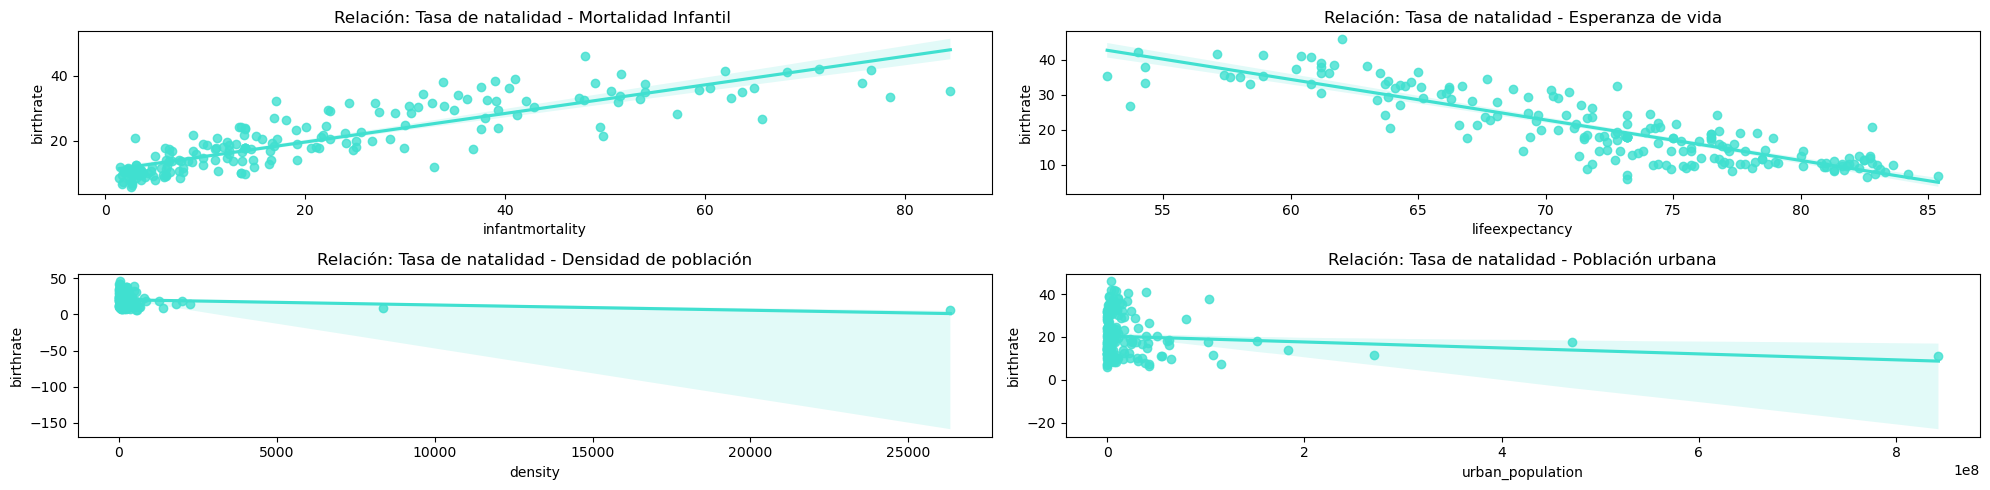

In [57]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))
axes = axes.flat #importante para los indices!!


sns.regplot(y = "birthrate", 
            x = "infantmortality",
            data = df_pair, 

            color = "turquoise", 
            ax = axes[0])


axes[0].set_title("Relación: Tasa de natalidad - Mortalidad Infantil ")


sns.regplot(y = "birthrate", 
            x = "lifeexpectancy",
            data = df_pair, 
            color = "turquoise", 
            ax = axes[1])


axes[1].set_title("Relación: Tasa de natalidad - Esperanza de vida")


sns.regplot(y = "birthrate", 
            x = "density",
            data = df_pair, 
            color = "turquoise", 
            ax = axes[2])

axes[2].set_title("Relación: Tasa de natalidad - Densidad de población")


sns.regplot(y = "birthrate", 
            x = "urban_population",
            data = df_pair, 
            color = "turquoise", 
            ax = axes[3])

axes[3].set_title("Relación: Tasa de natalidad - Población urbana")
plt.tight_layout();

para los dos ultimos gráficos: hacer boxplot/hisplot para revisar los outliers 

In [ ]:
df_pair.columns

6. ¿Cuáles son los 10 países con la mayor área forestal?


7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?


8. ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.


9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.


10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:


11. Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.


12. Un histograma de la tasa de impuestos total.


13. Un gráfico de barras que resuma la tasa de impuestos total por continente.